# Renewable energy

In [71]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import numpy as np

## Prepare data

In [6]:
df = pd.read_excel("repd-october-2022.xlsx", sheet_name="REPD")

In [8]:
df["Technology Type"].value_counts()

Solar Photovoltaics                 3321
Wind Onshore                        2297
Battery                              888
Anaerobic Digestion                  302
Landfill Gas                         292
Biomass (dedicated)                  237
EfW Incineration                     197
Small Hydro                          140
Advanced Conversion Technologies     129
Wind Offshore                         81
Large Hydro                           30
Tidal Barrage and Tidal Stream        28
Hydrogen                              23
Sewage Sludge Digestion               12
Pumped Storage Hydroelectricity       11
Shoreline Wave                         8
Biomass (co-firing)                    5
Geothermal                             5
Liquid Air Energy Storage              4
Hot Dry Rocks (HDR)                    2
Compressed Air Energy Storage          2
Flywheels                              1
Fuel Cell (Hydrogen)                   1
Name: Technology Type, dtype: int64

In [31]:
# convert to geodataframe
geometry = [Point(xy) for xy in zip(df['X-coordinate'].astype(float), df['Y-coordinate'].astype(float))]
gdf = gpd.GeoDataFrame(df, crs = 'EPSG:27700', geometry = geometry)
gdf = gdf.to_crs(epsg=4326)
gdf.head()

,Old Ref ID,Ref ID,Record Last Updated (dd/mm/yyyy),Operator (or Applicant),Site Name,Technology Type,Storage Type,Storage Co-location REPD Ref ID,Installed Capacity (MWelec),CHP Enabled,...,Appeal Granted,Planning Permission Granted,Secretary of State - Intervened,Secretary of State - Refusal,Secretary of State - Granted,Planning Permission Expired,Under Construction,Operational,Heat Network Ref,geometry
0,N00053B,1,2009-07-07,RWE npower,Aberthaw Power Station Biomass,Biomass (co-firing),NaN,NaN,35.0,No,...,NaT,2004-09-03,NaT,NaT,NaT,NaT,2006-05-01,2007-05-01,NaN,POINT (-3.40662 51.38747)
1,AA110,2,2017-11-20,Orsted (formerly Dong Energy) / Peel Energy,Hunterston - cofiring,Biomass (co-firing),NaN,NaN,170.0,No,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,POINT (-4.88855 55.73580)
2,B0730,3,2020-06-04,Scottish and Southern Energy (SSE),Ferrybridge Multifuel 2 (FM2),EfW Incineration,NaN,NaN,70.0,No,...,NaT,2015-10-28,NaT,NaT,NaT,2020-10-28,2016-09-01,2019-12-20,NaN,POINT (-1.28189 53.71644)
3,1106000,4,2003-12-18,Energy Power Resources,Thetford Biomass Power Station,Biomass (dedicated),NaN,NaN,38.5,No,...,NaT,1995-05-05,NaT,NaT,NaT,NaT,NaT,1998-10-02,NaN,POINT (0.72530 52.44865)
4,2047000,5,2005-09-29,Agrigen,Nunn Mills Road Biomass Plant,Biomass (dedicated),NaN,NaN,8.8,No,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,POINT (-0.88133 52.23021)


## Map

In [30]:
#load shapefile
regions_map = gpd.GeoDataFrame.from_file("uk_regions.geojson")

In [187]:
_filter = ( (gdf["Technology Type"]=="Solar Photovoltaics") &
      (gdf['Development Status (short)'].isin(["Awaiting Construction", "Operational"])))

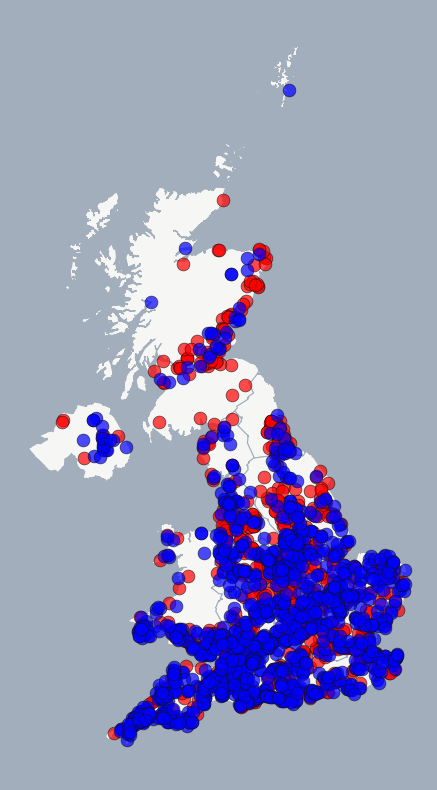

In [188]:
fig, ax = plt.subplots(figsize = (12,10))

#party colours
pointsPalette = {'Awaiting Construction': 'Red', 'Operational': 'Blue', 'Labour': '#DC241f'}
fig.set_facecolor("#A2AEBB")

### MAPS
#### UK
regions_map.to_crs(epsg=27700).plot(ax=ax, color='#f6f6f4', edgecolor='#A2AEBB', linewidth=0.75)
#df_uk = geo_df[~geo_df["Name"].isin(["Boris Johnson", "Bonar Law"])]

for ctype, data in gdf[_filter].to_crs(epsg=27700).groupby('Development Status (short)'):
    color = pointsPalette[ctype]
    label = ctype
    data.plot(color=color,
              ax=ax,
              label=label,
              markersize=85,
             edgecolor='#111111',
             linewidth=0.5,
             alpha=0.7)
ax.axis("off")
plt.show()

## Uber library

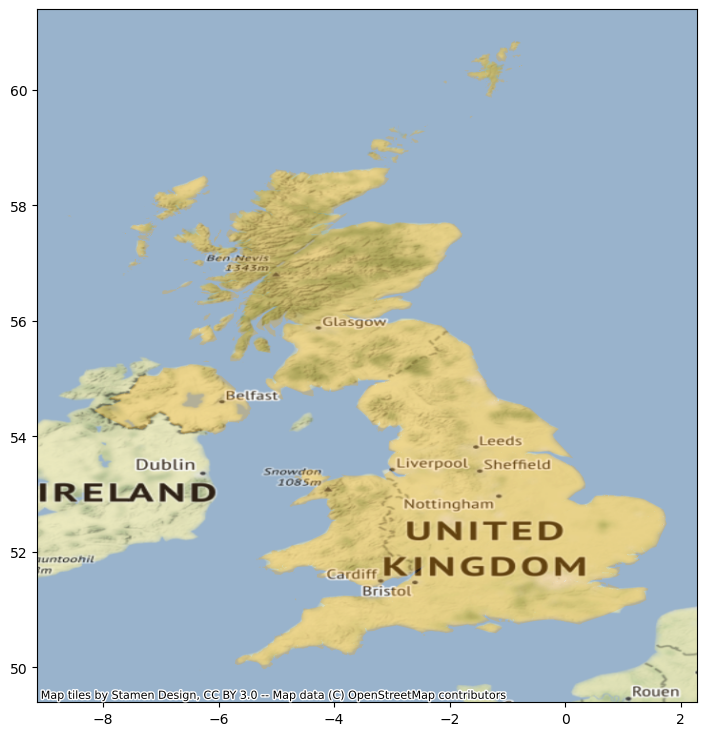

In [353]:
#Import the libraries
import geopandas
import contextily as ctx
%matplotlib inline

#Import the polygon for our area of interest with geopandas
sd = geopandas.read_file("uk_regions.geojson")

#Plot it to check it's been correctly ingested
ax = sd.plot(alpha=0.25, color="orange", figsize=(9, 9))
#Include a basemap just to be sure
ctx.add_basemap(ax, crs=sd.crs.to_string())

In [355]:
sd

,objectid,rgn19cd,rgn19nm,ctry19nmw,bng_e,bng_n,long,lat,st_areashape,st_lengthshape,geometry
0,1,E12000001,North East,None,417314,600356,-1.728880,55.297009,8.597298e+09,1.032344e+06,"MULTIPOLYGON (((-2.03000 55.77000, -2.02000 55..."
1,2,E12000002,North West,None,350014,506279,-2.772390,54.449440,1.416487e+10,2.387418e+06,"MULTIPOLYGON (((-2.53000 55.08000, -2.69000 55..."
2,3,E12000003,Yorkshire and the Humber,None,446902,448736,-1.287140,53.932640,1.540842e+10,1.392569e+06,"MULTIPOLYGON (((-0.79000 54.56000, -0.80000 54..."
3,4,E12000004,East Midlands,None,477659,322635,-0.849690,52.795719,1.564504e+10,1.388752e+06,"MULTIPOLYGON (((-0.30000 53.61000, -0.31000 53..."
4,5,E12000005,West Midlands,None,386294,295477,-2.203580,52.556969,1.300374e+10,9.537750e+05,"POLYGON ((-1.96000 53.22000, -1.98000 53.22000..."
5,6,E12000006,East,None,571078,263235,0.504207,52.240730,1.913255e+10,3.956838e+06,"MULTIPOLYGON (((1.00000 52.98000, 0.99000 52.9..."
6,7,E12000007,London,None,517515,178392,-0.308660,51.492271,1.573400e+09,4.326137e+05,"MULTIPOLYGON (((0.02000 51.64000, -0.19000 51...."
7,8,E12000008,South East,None,470062,172924,-0.993110,51.450970,1.908760e+10,2.803321e+06,"MULTIPOLYGON (((-0.67000 52.20000, -0.76000 52..."
8,9,E12000009,South West,None,285013,102567,-3.633460,50.811192,2.385026e+10,3.560109e+06,"MULTIPOLYGON (((-1.73000 52.09000, -1.82000 52..."
9,10,N92000002,Northern Ireland,Gogledd Iwerddon,86544,535337,-6.855700,54.615009,1.432976e+10,1.131048e+06,"MULTIPOLYGON (((-6.48000 55.25000, -6.49000 55..."


In [356]:
#Import the polygon for our area of interest with geopandas
sd = geopandas.read_file("uk_polygon.geojson")

In [358]:
#Import the H3 API and shapely
import h3

#Get all polygons that intersect our area of interest
hexs = h3.polyfill(sd["geometry"].iloc[0].__geo_interface__, 5, geo_json_conformant = True)
hexs

{'85182d27fffffff',
 '85182d2ffffffff',
 '851870d3fffffff',
 '851870d7fffffff',
 '851870dbfffffff',
 '85187403fffffff',
 '85187407fffffff',
 '8518740ffffffff',
 '85187417fffffff',
 '85187433fffffff',
 '8518743bfffffff',
 '85187463fffffff',
 '8518746ffffffff',
 '85187473fffffff',
 '85187477fffffff',
 '85187483fffffff',
 '85187487fffffff',
 '8518748bfffffff',
 '8518748ffffffff',
 '85187497fffffff',
 '851874a3fffffff',
 '851874a7fffffff',
 '851874abfffffff',
 '851874affffffff',
 '851874b3fffffff',
 '851874b7fffffff',
 '851874bbfffffff',
 '851875d3fffffff',
 '85190807fffffff',
 '85190817fffffff',
 '85190833fffffff',
 '85190837fffffff',
 '85190887fffffff',
 '85190897fffffff',
 '851908a3fffffff',
 '851908abfffffff',
 '851908affffffff',
 '851908b3fffffff',
 '851908b7fffffff',
 '851908bbfffffff',
 '85190903fffffff',
 '8519090bfffffff',
 '8519090ffffffff',
 '85190913fffffff',
 '85190917fffffff',
 '85190923fffffff',
 '85190927fffffff',
 '8519092bfffffff',
 '85190933fffffff',
 '85190937fffffff',


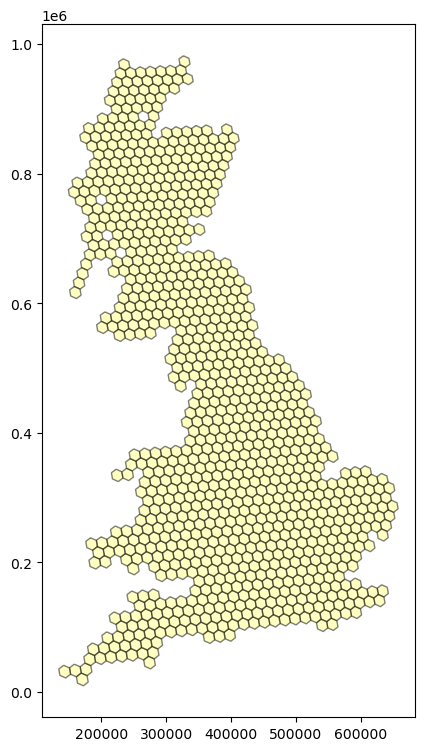

In [379]:
#Import the polygon object from shapely
from shapely.geometry import Polygon

#Set up a simple lambda function that makes the geo_boundary call from a hex id
polygonise = lambda hex_id: Polygon(h3.h3_to_geo_boundary(hex_id, geo_json=True))

#Create a geodataframe and populate the geometrie field with the result of the polygonise function with the hexs variable for input
all_polys = geopandas.GeoSeries(list(map(polygonise, hexs)), index=hexs, crs="EPSG:4326")
all_polys = all_polys.to_crs(27700)

#Plot it to see how it went
ax = all_polys.plot(alpha=0.5, color="xkcd:pale yellow",edgecolor="black", figsize=(9, 9))
#ctx.add_basemap(ax, crs=all_polys.crs.to_string())

In [362]:
all_polys

85194233fffffff    POLYGON ((-1.15199 53.43053, -1.25802 53.38302...
85197333fffffff    POLYGON ((-1.66923 55.18839, -1.77881 55.14197...
85190dbbfffffff    POLYGON ((-3.84758 57.09637, -3.96106 57.04947...
8519734ffffffff    POLYGON ((-2.73327 55.39462, -2.84318 55.34725...
851951abfffffff    POLYGON ((-2.73248 53.47897, -2.83850 53.42981...
                                         ...                        
85194173fffffff    POLYGON ((0.90596 52.74032, 0.80130 52.69441, ...
85194c4bfffffff    POLYGON ((1.39303 52.11537, 1.28960 52.06943, ...
85197233fffffff    POLYGON ((-2.81708 56.02016, -2.92832 55.97330...
85195857fffffff    POLYGON ((-2.96415 51.90236, -3.06720 51.85155...
85195ecffffffff    POLYGON ((-3.99746 52.87870, -4.10215 52.82766...
Length: 964, dtype: geometry

## Figuring out projections

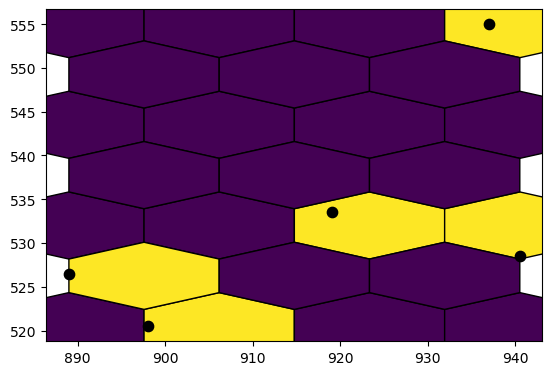

In [242]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from matplotlib.patches import RegularPolygon


geoms = [Point(919.000, 533.500), Point(940.500, 528.500), 
 Point(937.000, 555.000), Point(889.000, 526.500), Point(898.000, 520.500)]

l = gpd.GeoDataFrame({'geometry':geoms})

y= np.array([ 533.500,  528.500,  555.000,  526.500,  520.500])
x= np.array([ 919.000,  940.500,  937.000,  889.000,  898.000])

f,ax=plt.subplots(1)
im =ax.hexbin(x,y, gridsize=(3,3), edgecolor='black')
l.plot(ax=ax, color='black', markersize=55)

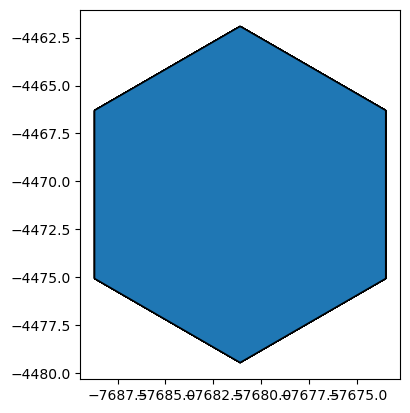

In [243]:
array_of_hexes=[]
for x,y in im.get_offsets():
    hexes = RegularPolygon((x, y), numVertices=6, radius= 5 )
    verts = hexes.get_path().vertices
    trans = im.get_transform()
    points = trans.transform(verts)
    array_of_hexes.append(Polygon(points))

gpd.GeoDataFrame({'geometry':array_of_hexes}).plot(edgecolor='black')

## Hexbin map

In [124]:
from matplotlib import cm
from matplotlib.collections import PatchCollection
from matplotlib.path import Path
from matplotlib.patches import PathPatch

def sized_hexbin(ax,hc,cmap, _max):
    offsets = hc.get_offsets()
    orgpath = hc.get_paths()[0]
    verts = orgpath.vertices
    values = hc.get_array()
    if _max == None:
        ma = values.max()
    else:
        ma = _max
    patches = []
    for offset,val in zip(offsets,values):
        v1 = verts*val/ma+offset
        path = Path(v1, orgpath.codes)
        patch = PathPatch(path)
        patches.append(patch)

    pc = PatchCollection(patches, cmap=cm.get_cmap(cmap), edgecolors='black')
    pc.set_array(values)
    ax.add_collection(pc)
    hc.remove()

In [146]:
import contextily as cx
import rasterio
from rasterio.plot import show as rioshow

In [182]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

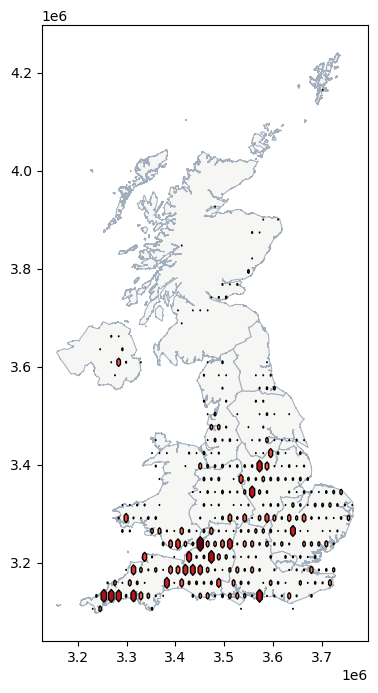

In [361]:
crs = 3035  
_filter = ( (gdf["Technology Type"]=="Solar Photovoltaics") &
      (gdf['Development Status (short)'].isin(["Operational"])))
test = gdf[_filter].to_crs(crs).dropna(subset=["X-coordinate", "Y-coordinate"])
test["Count"] = 1
test.head()

fig, ax = plt.subplots(figsize=(8,8))

regions_map.to_crs(epsg=crs).plot(ax=ax, color='#f6f6f4', edgecolor='#A2AEBB', linewidth=0.75)
hexbin = ax.hexbin(test["geometry"].x, test["geometry"].y, test["Count"] , reduce_C_function = np.sum, gridsize=35,
                   cmap= cm.get_cmap('Reds'),edgecolors='black')

sized_hexbin(ax,hexbin, "Reds", 19)

#ax.set_ylim(ymin=50, ymax=58)
plt.show()

In [164]:
#collection = plt.hexbin(x,y, gridsize=(5,5)
hex_polys = hexbin.get_paths()[0].vertices
hex_array = []
for xs,ys in hexbin.get_offsets():
    hex_x = np.add(hex_polys[:,0],  xs)
    hex_y = np.add(hex_polys[:,1],  ys)
    hex_array.append(Polygon(np.vstack([hex_x, hex_y]).T))

    
hex_grid = gpd.GeoDataFrame(crs = 'EPSG:4326', geometry = hex_array)

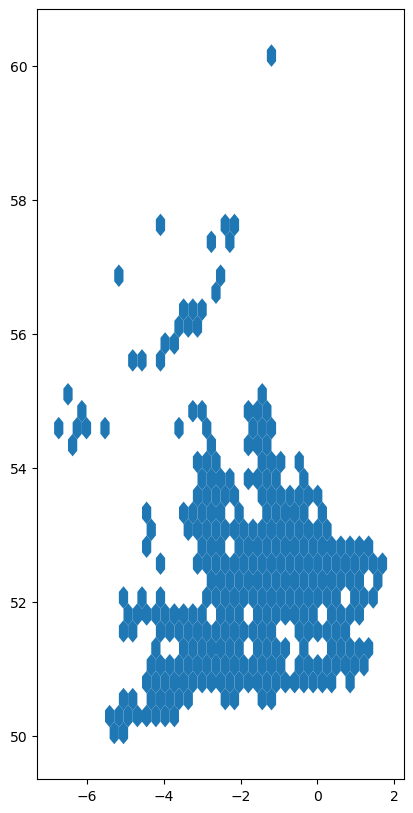

In [233]:
hex_grid.to_crs(4606).plot(figsize=(10,10))

In [163]:
hex_grid

,geometry
0,"POLYGON ((-6.61864 54.50946, -6.61864 54.67787..."
1,"POLYGON ((-6.37748 55.01470, -6.37748 55.18311..."
2,"POLYGON ((-6.13633 54.50946, -6.13633 54.67787..."
3,"POLYGON ((-5.89517 54.50946, -5.89517 54.67787..."
4,"POLYGON ((-5.41286 54.50946, -5.41286 54.67787..."
...,...
303,"POLYGON ((1.21891 52.23587, 1.21891 52.40428, ..."
304,"POLYGON ((1.21891 52.74111, 1.21891 52.90953, ..."
305,"POLYGON ((1.46006 51.22539, 1.46006 51.39380, ..."
306,"POLYGON ((1.46006 52.74111, 1.46006 52.90953, ..."


In [149]:
test["geometry"]

909        POINT (7684.998 7061685.216)
910     POINT (-538381.025 6504864.293)
911     POINT (-597584.558 6484100.232)
912     POINT (-476670.244 6523240.686)
913     POINT (-492826.132 6598355.891)
                     ...               
7072    POINT (-171540.872 7330689.045)
7217      POINT (95907.755 6900813.654)
7257     POINT (123480.225 6867796.952)
7501    POINT (-102324.182 6843809.609)
7502    POINT (-329217.745 6723483.292)
Name: geometry, Length: 1246, dtype: geometry

In [135]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [130]:
hexbin.get_array().max()

19.0

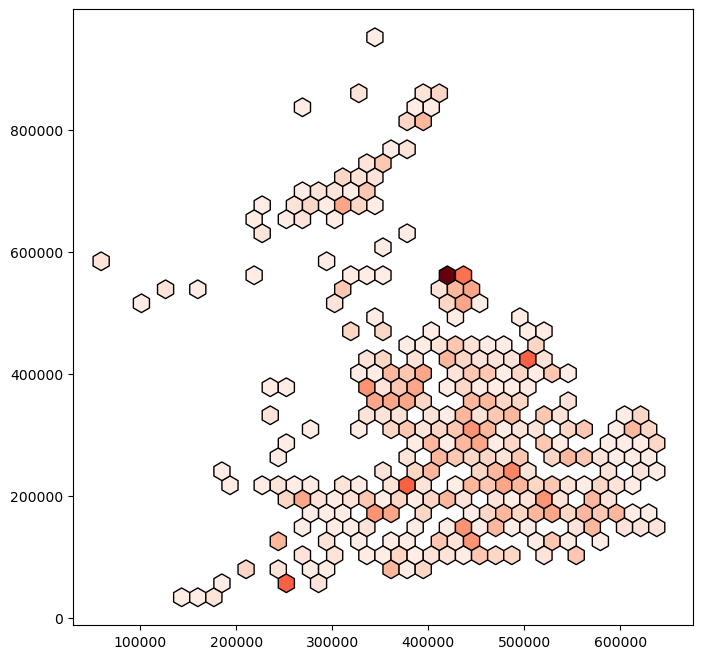

In [228]:
_filter = ( (gdf["Technology Type"]=="Solar Photovoltaics") &
      (gdf['Development Status (short)'].isin(["Awaiting Construction"])))
test = gdf[_filter].dropna(subset=["X-coordinate", "Y-coordinate"])
test["Count"] = 1
test.head()

fig, ax = plt.subplots(figsize=(8,8))
#hexbin = ax.hexbin(test['X-coordinate'], test['Y-coordinate'], test["Installed Capacity (MWelec)"], reduce_C_function = np.sum, 
               #    gridsize=35,cmap= cm.get_cmap('Reds'),edgecolors='black', vmin=0)

hexbin = ax.hexbin(test['X-coordinate'], test['Y-coordinate'], test["Count"] , reduce_C_function = np.sum, gridsize=35,
                   cmap= cm.get_cmap('Reds'),edgecolors='black', vmin=0, vmax=19)

#sized_hexbin(ax,hexbin, "Reds", 19)
plt.show()

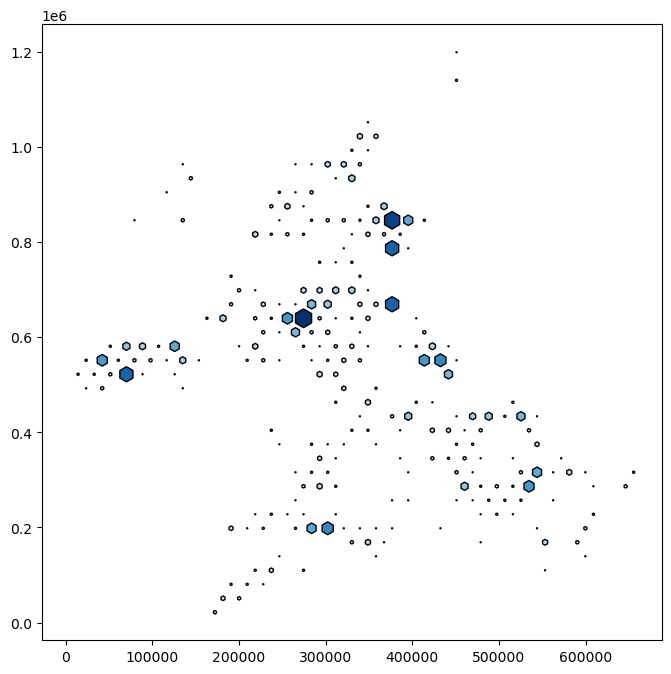

In [119]:
_filter = ( (gdf["Technology Type"]=="Wind Onshore") &
      (gdf['Development Status (short)'].isin(["Operational"])))
test = gdf[_filter].copy().dropna(subset=["X-coordinate", "Y-coordinate"])
test["Count"] = 1
test.head()

fig, ax = plt.subplots(figsize=(8,8))
#hexbin = ax.hexbin(test['X-coordinate'], test['Y-coordinate'], test["Installed Capacity (MWelec)"], reduce_C_function = np.sum, 
               #    gridsize=35,cmap= cm.get_cmap('Reds'),edgecolors='black', vmin=0)

hexbin = ax.hexbin(test['X-coordinate'], test['Y-coordinate'], test["Count"] , reduce_C_function = np.sum, gridsize=35,
                   cmap= cm.get_cmap('Blues'),edgecolors='black', vmin=0, vmax=hexbin.get_array().max())

sized_hexbin(ax,hexbin, "Blues")


plt.show()

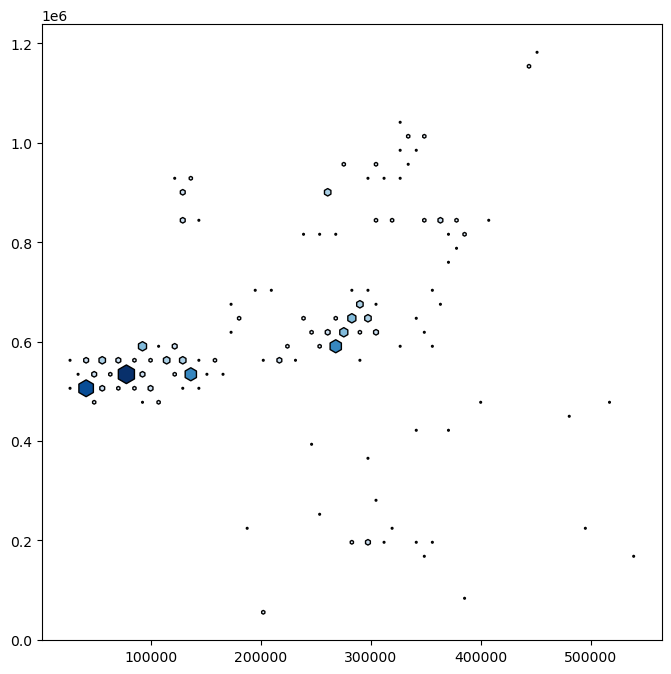

In [120]:
_filter = ( (gdf["Technology Type"]=="Wind Onshore") &
      (gdf['Development Status (short)'].isin(["Awaiting Construction"])))
test = gdf[_filter].copy().dropna(subset=["X-coordinate", "Y-coordinate"])
test["Count"] = 1
test.head()

fig, ax = plt.subplots(figsize=(8,8))
#hexbin = ax.hexbin(test['X-coordinate'], test['Y-coordinate'], test["Installed Capacity (MWelec)"], reduce_C_function = np.sum, 
               #    gridsize=35,cmap= cm.get_cmap('Reds'),edgecolors='black', vmin=0)

hexbin = ax.hexbin(test['X-coordinate'], test['Y-coordinate'], test["Count"] , reduce_C_function = np.sum, gridsize=35,
                   cmap= cm.get_cmap('Blues'),edgecolors='black', vmin=0, vmax=hexbin.get_array().max())

sized_hexbin(ax,hexbin, "Blues")


plt.show()

In [114]:
gdf["Technology Type"].value_counts()

Solar Photovoltaics                 3321
Wind Onshore                        2297
Battery                              888
Anaerobic Digestion                  302
Landfill Gas                         292
Biomass (dedicated)                  237
EfW Incineration                     197
Small Hydro                          140
Advanced Conversion Technologies     129
Wind Offshore                         81
Large Hydro                           30
Tidal Barrage and Tidal Stream        28
Hydrogen                              23
Sewage Sludge Digestion               12
Pumped Storage Hydroelectricity       11
Shoreline Wave                         8
Biomass (co-firing)                    5
Geothermal                             5
Liquid Air Energy Storage              4
Hot Dry Rocks (HDR)                    2
Compressed Air Energy Storage          2
Flywheels                              1
Fuel Cell (Hydrogen)                   1
Name: Technology Type, dtype: int64